In [1]:
import os
os.environ['USE_PYGEOS'] = '0'
path_root = os.getcwd()
import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
from pathlib import Path

os.chdir('../py/')
from plot.results import roebber_diagram
os.chdir(path_root)

In [ ]:
def CSI(precision, recall):
    
    return (1 / precision + 1 / recall - 1)**-1

In [ ]:
def Fscore(precision, recall, beta=1):
    
    return (1 + beta**2) * precision * recall / (beta**2 * precision + recall)

In [ ]:
def precision(fscore, recall, beta):
    
    return fscore * beta / (beta**2 * f - (1 + beta**2) * R)

In [ ]:
def recall_f(fscore, precision, beta=1):
    
    return beta**2 * fscore * precision / ((1 + beta**2) * precision - fscore)

## Resultados

In [2]:
results = {'NWP': {'current': [.618, .413],
                   'COS': [.687, .387],
                   'DWD': [.522, .42],
                   'EUD': [.612, .416],
                   'EUE': [.725, .416]},
            'COMB': {'EUE': [.725, .416],
                     '1D+1P': [.643, .455],
                     'MM': [.7, .424],
                     'MW': [.692, .455],
                     'BW': [.7, .451]}}

### Roebber diagram

In [3]:
top = cm.get_cmap('Blues_r', 128)
bottom = cm.get_cmap('Oranges', 128)
newcolors = np.vstack((top(np.linspace(0.2, .95, 128)),
                       bottom(np.linspace(.05, .8, 128))))
BuOr = ListedColormap(newcolors, name='BlueOrange')

### NWP

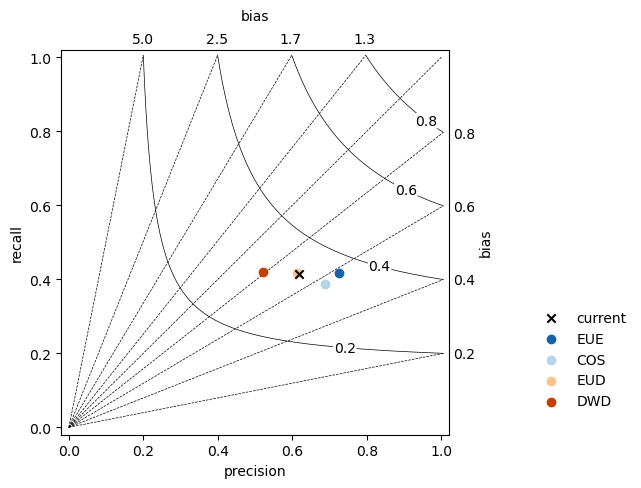

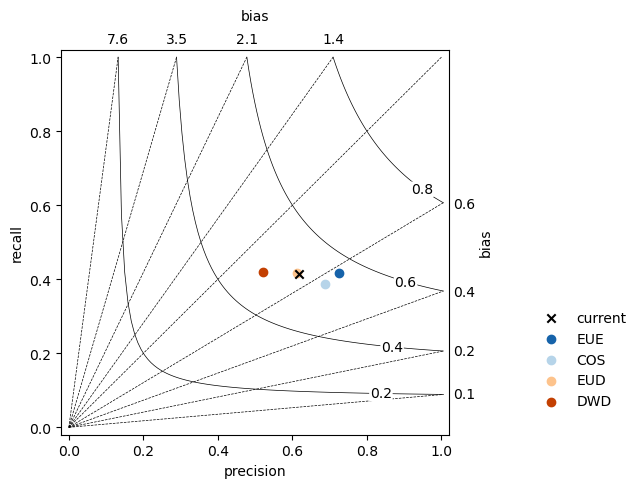

In [4]:
exp = 'NWP'

cmap = BuOr
colors = ListedColormap(cmap(np.linspace(0, 1, 4))).colors

for metric in ['CSI', 'fscore']:

    fig, ax = roebber_diagram(metric=metric, beta=.8)

    # benchmark
    ax.scatter(*results[exp]['current'], marker='x', c='k', label='current', zorder=10)

    # NWP
    for key, color in zip(['EUE', 'COS', 'EUD', 'DWD'], colors):
        ax.scatter(*results[exp][key], color=color, label=key)

    fig.legend(frameon=False, bbox_to_anchor=[1.08, .05, .2, .333])

    plt.savefig(f'../results/skill/2020_2023/{exp}/12_60_144_180/window_1/kge_0.5/roebber_{exp}_{metric}_60h.pdf',
                dpi=300, bbox_inches='tight');

### COMB 

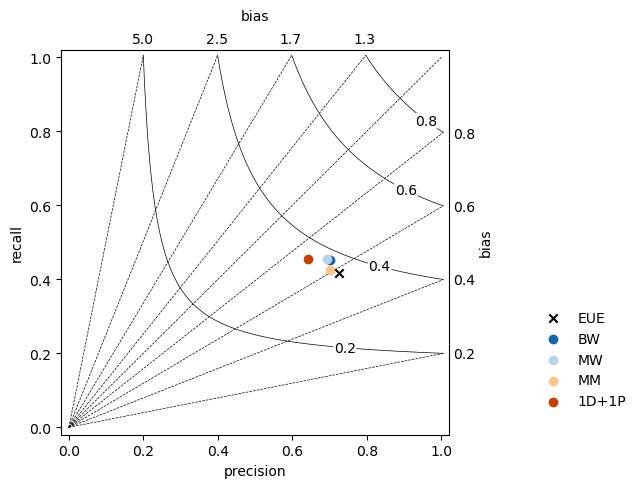

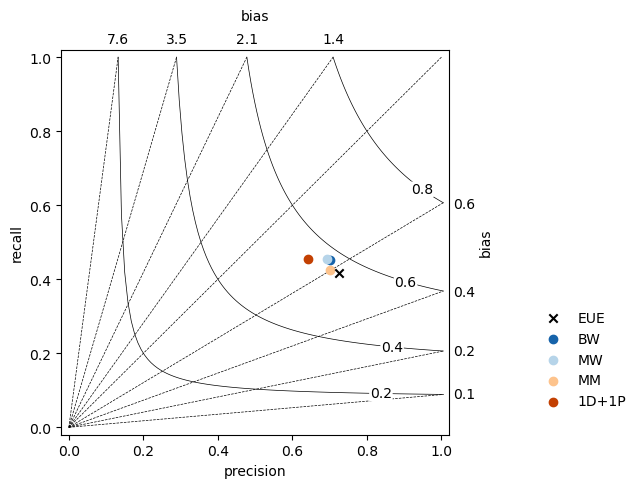

In [5]:
exp = 'COMB'

cmap = BuOr
colors = ListedColormap(cmap(np.linspace(0, 1, 4))).colors

for metric in ['CSI', 'fscore']:

    fig, ax = roebber_diagram(metric=metric, beta=.8)

    # benchmark
    ax.scatter(*results[exp]['EUE'], marker='x', c='k', label='EUE', zorder=10)

    # combination
    for key, color in zip(['BW', 'MW', 'MM', '1D+1P'], colors):
        ax.scatter(*results[exp][key], color=color, label=key)

    fig.legend(frameon=False, bbox_to_anchor=[1.08, .05, .2, .333])

    plt.savefig(f'../results/skill/2020_2023/combination/12_60_144_180/window_1/kge_0.5/roebber_{exp}_{metric}_60h.pdf',
                dpi=300, bbox_inches='tight');